# Download Data

**Reference Paper** for this project is [here](https://arxiv.org/pdf/1701.05927.pdf).
<br>
**Data** is available [here](https://zenodo.org/record/269622#.Xkq0-jIzapq).

In [0]:
! wget https://zenodo.org/record/269622/files/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5

--2020-02-17 14:44:24--  https://zenodo.org/record/269622/files/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2220068544 (2.1G) [application/octet-stream]
Saving to: ‘jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5’

jet-images_Mass60-1 100%[===================>]   2.07G  9.18MB/s    in 5m 4s   

2020-02-17 14:49:30 (6.96 MB/s) - ‘jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5’ saved [2220068544/2220068544]



# Load Data and Libraries


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import h5py

In [0]:
filename = 'jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'

images = 0
df = {}

with h5py.File(name=filename, mode="r") as f:
    for key in f.keys():
      if key != "image":
          df[key] = np.array(f[key])
      else:
          images = np.array(f[key])
f.close()
del f

Attribute of the dataset are as follow:
* **image** : array of dim (872666, 25, 25), contains the pixel intensities of each 25x25 image
* **signal** : binary array to identify signal (1, i.e. W boson) vs background (0, i.e. QCD)
* **jet_eta**: eta coordinate per jet
* **jet_phi**: phi coordinate per jet
* **jet_mass**: mass per jet
* **jet_pt**: transverse momentum per jet
* **jet_delta_R**: distance between leading and subleading subjets if 2 subjets present, else 0
* **tau_1, tau_2, tau_3**: substructure variables per jet (a.k.a. n-subjettiness, where n=1, 2, 3)
* **tau_21**: tau2/tau1 per jet
* **tau_32**: tau3/tau2 per jet

Information is taken from [here](https://zenodo.org/record/269622#.Xkq0-jIzapq).

# Data Statistics

In [49]:
pd.DataFrame(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872666 entries, 0 to 872665
Data columns (total 11 columns):
jet_delta_R    872666 non-null float32
jet_eta        872666 non-null float32
jet_mass       872666 non-null float32
jet_phi        872666 non-null float32
jet_pt         872666 non-null float32
signal         872666 non-null float32
tau_1          872666 non-null float32
tau_2          872666 non-null float32
tau_21         872666 non-null float32
tau_3          872666 non-null float32
tau_32         872666 non-null float32
dtypes: float32(11)
memory usage: 36.6 MB


In [48]:
pd.DataFrame(df).describe()

,jet_delta_R,jet_eta,jet_mass,jet_phi,jet_pt,signal,tau_1,tau_2,tau_21,tau_3,tau_32
count,872666.000000,872666.000000,872666.000000,872666.000000,872666.000000,872666.0,872666.000000,872666.000000,872666.000000,872666.000000,872666.000000
mean,0.599200,0.000975,77.920799,3.137256,275.284485,0.5,0.204142,0.073467,0.368177,0.048586,0.660223
std,0.150271,1.048868,9.311319,1.813353,14.492263,0.5,0.054008,0.037783,0.173302,0.026771,0.120327
min,0.000000,-1.999968,60.000027,0.000008,250.000031,0.0,0.048674,0.000725,0.003463,0.000000,0.000000
25%,0.500033,-0.841927,71.264097,1.566417,262.650650,0.0,0.164827,0.043723,0.224894,0.027443,0.588793
50%,0.578704,0.000773,78.214741,3.133180,275.312439,0.5,0.205124,0.067921,0.351941,0.044068,0.677434
75%,0.685856,0.842834,83.600691,4.707176,287.844330,1.0,0.244204,0.098206,0.501502,0.065582,0.748942
max,1.091765,1.999981,99.999870,6.283181,299.999908,1.0,0.394305,0.272232,0.918190,0.200013,0.982122


# Data Histograms

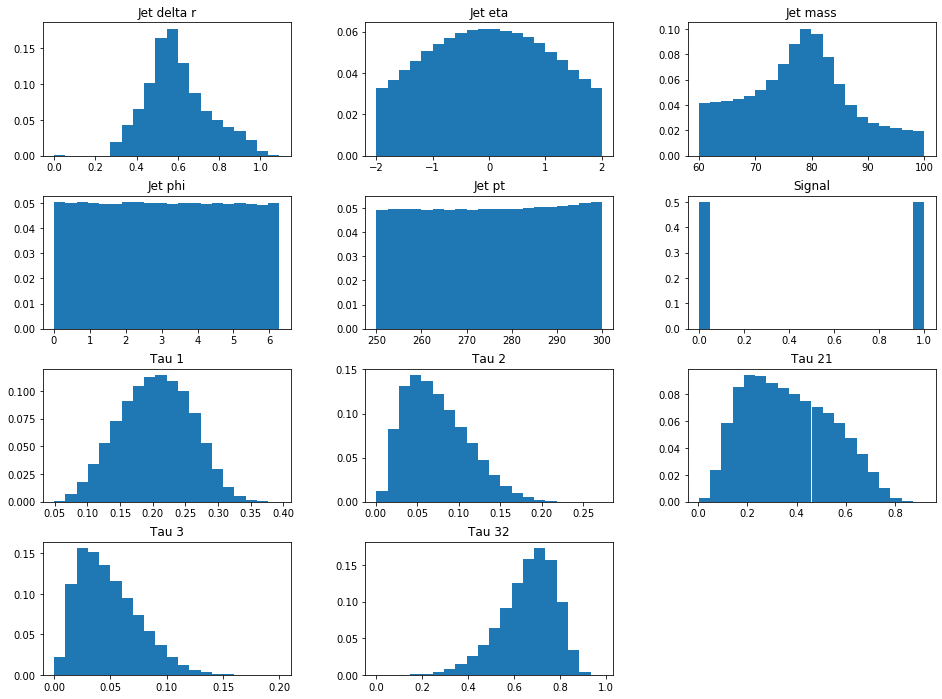

In [14]:
plt.rcParams["figure.figsize"] = 16, 12
plt.subplots_adjust(wspace=0.3, hspace=0.3)

weights = np.ones_like(df["tau_1"])/float(len(df["tau_1"]))

for idx, key in enumerate(df.keys()):
    plt.subplot(4, 3, idx+1)
    plt.hist(df[key], weights=weights, bins=20)
    plt.title(key.replace("_", " ").capitalize())
plt.show()

# Conditional Data Histograms
Data is conditioned on signal variable.

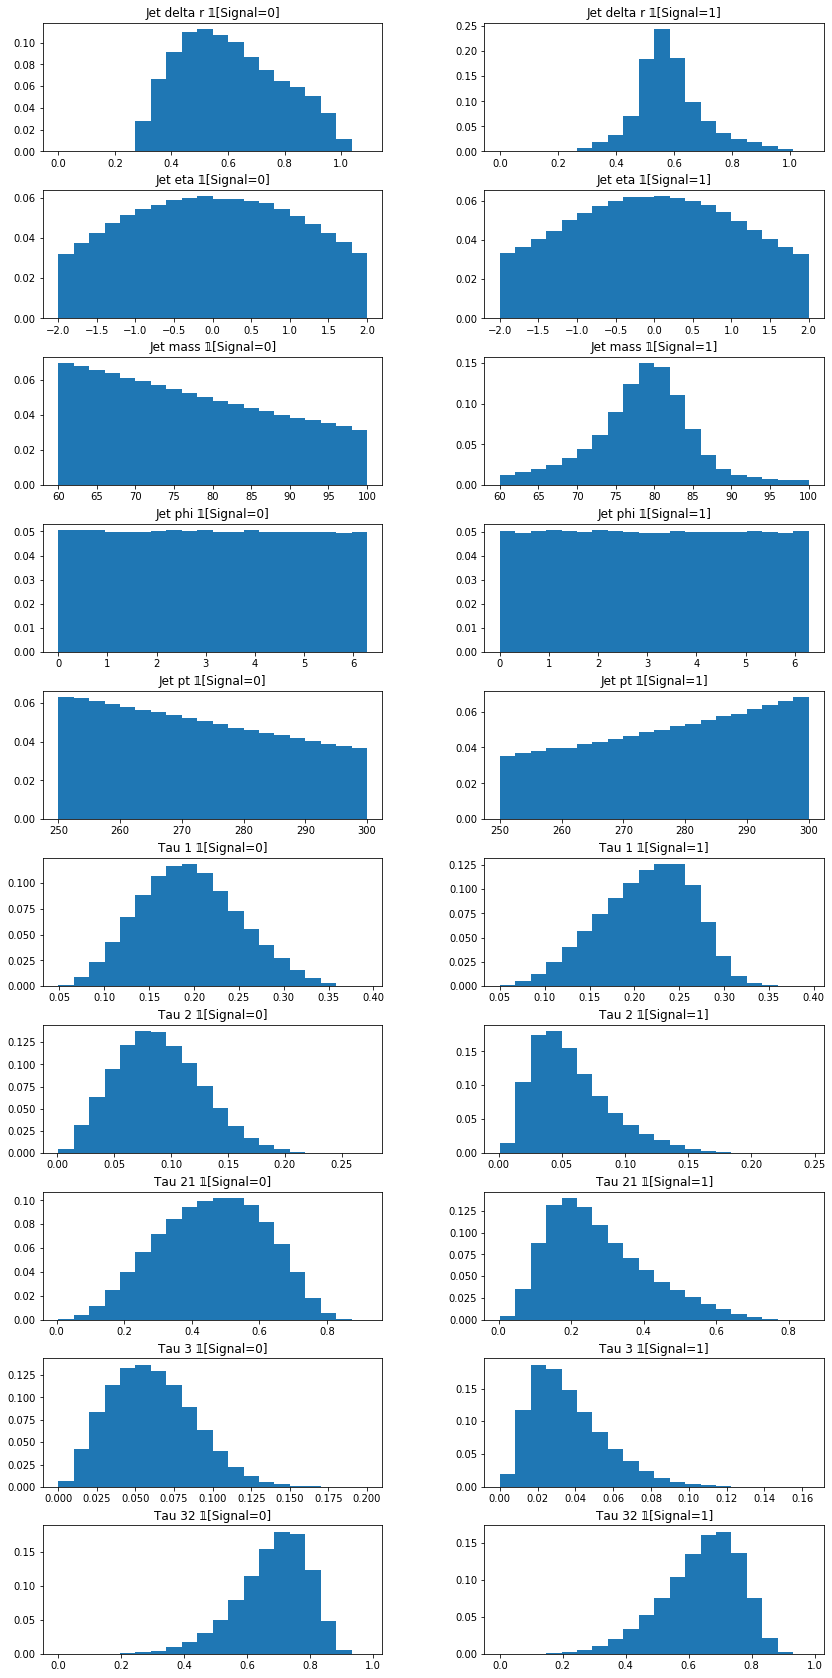

In [40]:
plt.rcParams["figure.figsize"] = 14, 30
plt.subplots_adjust(wspace=0.3, hspace=0.3)

idx = (df["signal"] == 1)
weights_1 = np.ones_like(df["tau_1"][idx])/float(len(df["tau_1"][idx]))
weights_0 = np.ones_like(df["tau_1"][~idx])/float(len(df["tau_1"][~idx]))

keys = list(df.keys())
keys.remove("signal")

for i, key in enumerate(keys):
    if key != "signal":
        plt.subplot(10, 2, (2*i+1))
        plt.hist(df[key][~idx], weights=weights_0, bins=20)
        plt.title("{} 𝟙[Signal=0]".format(key.replace("_", " ").capitalize()))

        plt.subplot(10, 2, (2*i+2))
        plt.hist(df[key][idx], weights=weights_1, bins=20)
        plt.title("{} 𝟙[Signal=1]".format(key.replace("_", " ").capitalize()))
plt.show()

# Box Plot

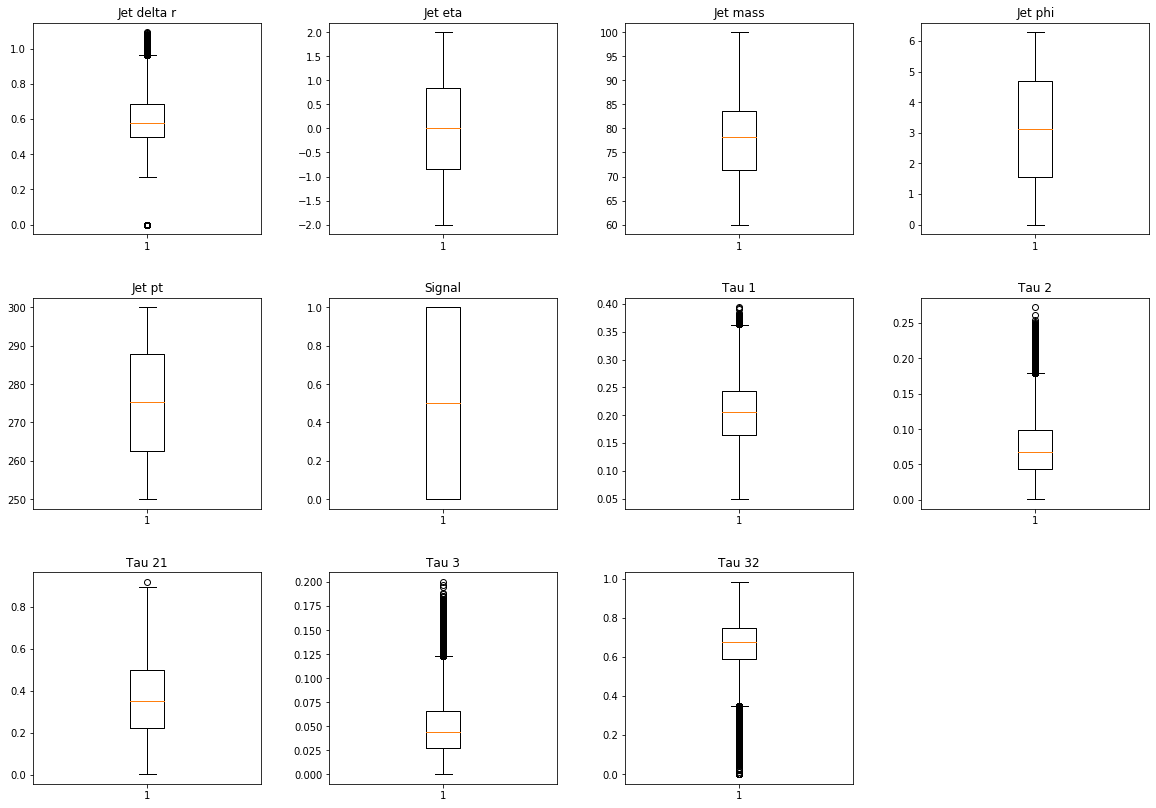

In [52]:
plt.rcParams["figure.figsize"] = 20, 14
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for idx, key in enumerate(df.keys()):
    plt.subplot(3, 4, idx+1)
    plt.boxplot(df[key])
    plt.title(key.replace("_", " ").capitalize())
plt.show()

# Conditional Box Plot
Conditioned on Signal Variable

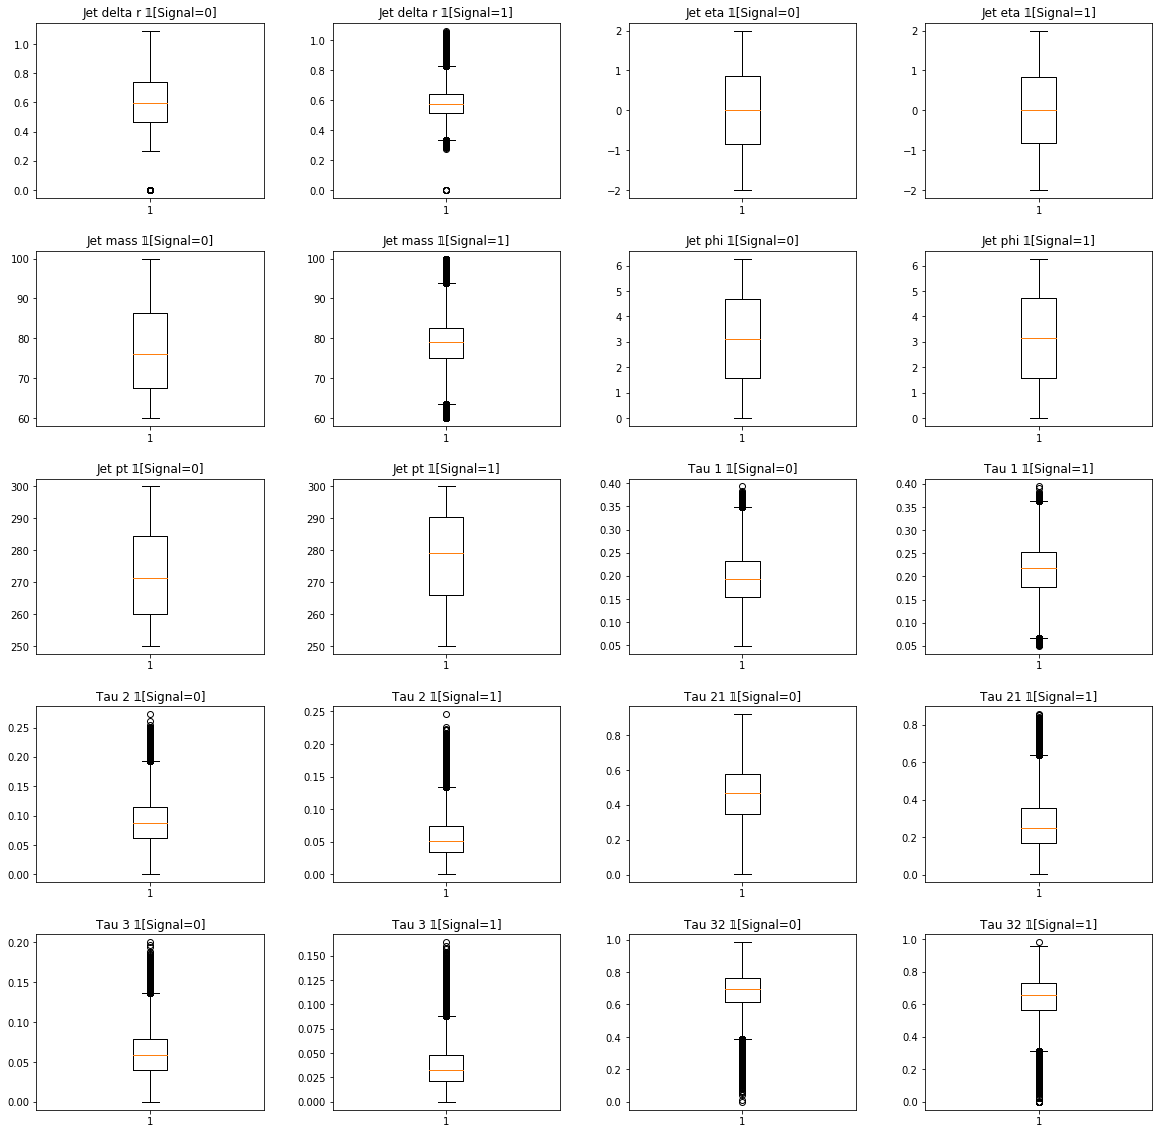

In [56]:
plt.rcParams["figure.figsize"] = 20, 20
plt.subplots_adjust(wspace=0.3, hspace=0.3)

idx = (df["signal"] == 1)

keys = list(df.keys())
keys.remove("signal")

for i, key in enumerate(keys):
    if key != "signal":
        plt.subplot(5, 4, (2*i+1))
        plt.boxplot(df[key][~idx])
        plt.title("{} 𝟙[Signal=0]".format(key.replace("_", " ").capitalize()))

        plt.subplot(5, 4, (2*i+2))
        plt.boxplot(df[key][idx])
        plt.title("{} 𝟙[Signal=1]".format(key.replace("_", " ").capitalize()))
plt.show()